# Candlestick Charts

[*********************100%***********************]  1 of 1 completed


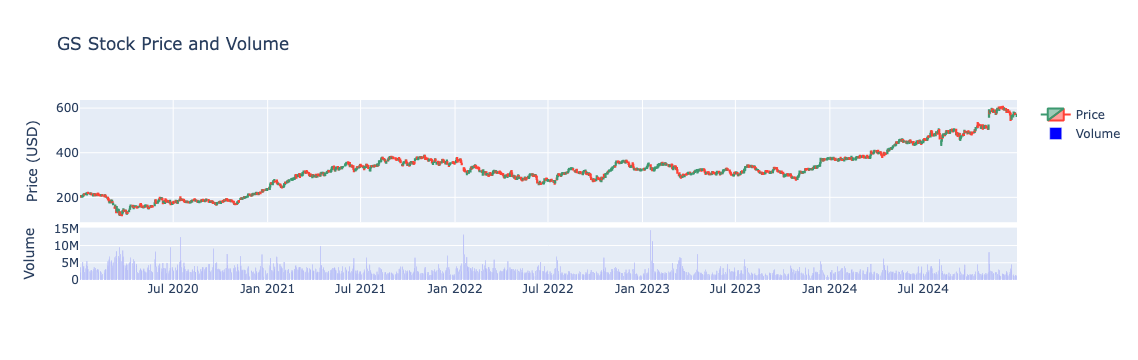

Detected Patterns:
 Price             Open        High         Low       Close            Pattern
Ticker              GS          GS          GS          GS                   
Date                                                                         
2020-01-03  203.911412  204.800658  202.766828  203.893799               Doji
2020-01-06  202.441055  206.042091  202.053670  205.980453  Bullish Engulfing
2020-01-14  215.991118  218.808544  215.357195  216.290466               Doji
2020-02-10  209.017985  209.431796  207.309930  208.982773               Doji
2020-02-21  203.303875  204.087472  201.067534  203.048538               Doji
...                ...         ...         ...         ...                ...
2024-11-13  588.779169  597.611384  586.818670  588.373169               Doji
2024-11-15  587.521668  589.284183  581.313403  587.699890               Doji
2024-11-18  588.858378  589.214821  578.966624  582.204468  Bearish Engulfing
2024-12-16  585.098694  585.367381  575.8445

In [5]:
import numpy as np
import pandas as pd
from datetime import datetime
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# === 1. DOWNLOAD DATA ===

start_date = datetime(2020, 1, 1)
end_date = datetime(2024, 12, 31)
stock_symbol = 'GS'

# Download stock data
stock = yf.download(stock_symbol, start=start_date, end=end_date)

# === 2. PATTERN DETECTION FUNCTIONS ===


def is_doji(row, threshold=0.1):
    return abs(row[('Open', 'GS')] - row[('Close', 'GS')]) <= threshold * (row[('High', 'GS')] - row[('Low', 'GS')])

def is_hammer(row):
    body = abs(row[('Close', 'GS')] - row[('Open', 'GS')])
    lower_shadow = min(row[('Open', 'GS')], row[('Close', 'GS')]) - row[('Low', 'GS')]
    upper_shadow = row[('High', 'GS')] - max(row[('Open', 'GS')], row[('Close', 'GS')])
    return lower_shadow > 2 * body and upper_shadow < body

def is_bullish_engulfing(prev_row, curr_row):
    return (prev_row[('Close', 'GS')] < prev_row[('Open', 'GS')]) and (curr_row[('Close', 'GS')] > curr_row[('Open', 'GS')]) and \
           (curr_row[('Close', 'GS')] > prev_row[('Open', 'GS')]) and (curr_row[('Open', 'GS')] < prev_row[('Close', 'GS')])

def is_bearish_engulfing(prev_row, curr_row):
    return (prev_row[('Close', 'GS')] > prev_row[('Open', 'GS')]) and (curr_row[('Close', 'GS')] < curr_row[('Open', 'GS')]) and \
           (curr_row[('Open', 'GS')] > prev_row[('Close', 'GS')]) and (curr_row[('Close', 'GS')] < prev_row[('Open', 'GS')])

# === 3. APPLY PATTERN DETECTION ===

patterns = ['']  # First row has no previous row

for i in range(1, len(stock)):
    row = stock.iloc[i].to_dict()
    prev_row = stock.iloc[i-1].to_dict()
    # row = stock.iloc[i]
    # prev_row = stock.iloc[i-1]
    
    if is_doji(row):
        patterns.append('Doji')
    elif is_hammer(row):
        patterns.append('Hammer')
    elif is_bullish_engulfing(prev_row, row):
        patterns.append('Bullish Engulfing')
    elif is_bearish_engulfing(prev_row, row):
        patterns.append('Bearish Engulfing')
    else:
        patterns.append('')

stock['Pattern'] = patterns

# === 4. CREATE CANDLESTICK + VOLUME CHART ===
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    row_heights=[0.7, 0.3], # Adjusting heights for price and volume
                    vertical_spacing=0.03)

# Add the candlestick chart to the first row
fig.add_trace(go.Candlestick(x=stock.index,
                             open=stock['Open'][stock_symbol],
                             high=stock['High'][stock_symbol],
                             low=stock['Low'][stock_symbol],
                             close=stock['Close'][stock_symbol],
                             name='Price'), 
              row=1, col=1)

# Add the volume bar chart to the second row
fig.add_trace(go.Bar(x=stock.index, 
                     y=stock['Volume'][stock_symbol], 
                     name='Volume', 
                     marker=dict(color='blue')), 
              row=2, col=1)

# Update layout for the figure
fig.update_layout(
    title=stock_symbol + " Stock Price and Volume",
    yaxis_title='Price (USD)',
    yaxis2_title='Volume',
    xaxis_rangeslider_visible=False
)

fig.show()


print("Detected Patterns:\n", stock[stock['Pattern'] != ''][['Open', 'High', 'Low', 'Close', 'Pattern']])


# Now write to Excel
stock.to_csv('detected_patterns.csv', index=True)


In [6]:
#Bullish Engulfing

In [7]:
import numpy as np
import pandas as pd
from datetime import datetime
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# === 1. DOWNLOAD DATA ===

start_date = datetime(2024, 2, 27)
end_date = datetime(2024, 3, 1)
stock_symbol = 'GS'

# Download stock data
stock = yf.download(stock_symbol, start=start_date, end=end_date)

# === 2. PATTERN DETECTION FUNCTIONS ===


def is_doji(row, threshold=0.1):
    return abs(row[('Open', 'GS')] - row[('Close', 'GS')]) <= threshold * (row[('High', 'GS')] - row[('Low', 'GS')])

def is_hammer(row):
    body = abs(row[('Close', 'GS')] - row[('Open', 'GS')])
    lower_shadow = min(row[('Open', 'GS')], row[('Close', 'GS')]) - row[('Low', 'GS')]
    upper_shadow = row[('High', 'GS')] - max(row[('Open', 'GS')], row[('Close', 'GS')])
    return lower_shadow > 2 * body and upper_shadow < body

def is_bullish_engulfing(prev_row, curr_row):
    return (prev_row[('Close', 'GS')] < prev_row[('Open', 'GS')]) and (curr_row[('Close', 'GS')] > curr_row[('Open', 'GS')]) and \
           (curr_row[('Close', 'GS')] > prev_row[('Open', 'GS')]) and (curr_row[('Open', 'GS')] < prev_row[('Close', 'GS')])

def is_bearish_engulfing(prev_row, curr_row):
    return (prev_row[('Close', 'GS')] > prev_row[('Open', 'GS')]) and (curr_row[('Close', 'GS')] < curr_row[('Open', 'GS')]) and \
           (curr_row[('Open', 'GS')] > prev_row[('Close', 'GS')]) and (curr_row[('Close', 'GS')] < prev_row[('Open', 'GS')])

# === 3. APPLY PATTERN DETECTION ===

patterns = ['']  # First row has no previous row

for i in range(1, len(stock)):
    row = stock.iloc[i].to_dict()
    prev_row = stock.iloc[i-1].to_dict()
    # row = stock.iloc[i]
    # prev_row = stock.iloc[i-1]
    
    if is_doji(row):
        patterns.append('Doji')
    elif is_hammer(row):
        patterns.append('Hammer')
    elif is_bullish_engulfing(prev_row, row):
        patterns.append('Bullish Engulfing')
    elif is_bearish_engulfing(prev_row, row):
        patterns.append('Bearish Engulfing')
    else:
        patterns.append('')

stock['Pattern'] = patterns

# === 4. CREATE CANDLESTICK + VOLUME CHART ===
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    row_heights=[0.7, 0.3], # Adjusting heights for price and volume
                    vertical_spacing=0.03)

# Add the candlestick chart to the first row
fig.add_trace(go.Candlestick(x=stock.index,
                             open=stock['Open'][stock_symbol],
                             high=stock['High'][stock_symbol],
                             low=stock['Low'][stock_symbol],
                             close=stock['Close'][stock_symbol],
                             name='Price'), 
              row=1, col=1)

# Add the volume bar chart to the second row
fig.add_trace(go.Bar(x=stock.index, 
                     y=stock['Volume'][stock_symbol], 
                     name='Volume', 
                     marker=dict(color='blue')), 
              row=2, col=1)

# Update layout for the figure
fig.update_layout(
    title=stock_symbol + " Stock Price and Volume",
    yaxis_title='Price (USD)',
    yaxis2_title='Volume',
    xaxis_rangeslider_visible=False
)

fig.show()
# === 7. PRINT PATTERN DATES ===

print("Detected Patterns:\n", stock[stock['Pattern'] != ''][['Open', 'High', 'Low', 'Close', 'Pattern']])



[*********************100%***********************]  1 of 1 completed


Detected Patterns:
 Price             Open        High        Low       Close            Pattern
Ticker              GS          GS         GS          GS                   
Date                                                                        
2024-02-28  378.832931  384.771924  378.64703  384.693634  Bullish Engulfing


In [8]:
# Few Pattern

In [9]:
import numpy as np
import pandas as pd
from datetime import datetime
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# === 1. DOWNLOAD DATA ===

start_date = datetime(2024, 3, 1)
end_date = datetime(2024, 3, 25)
stock_symbol = 'GS'

# Download stock data
stock = yf.download(stock_symbol, start=start_date, end=end_date)

# === 2. PATTERN DETECTION FUNCTIONS ===


def is_doji(row, threshold=0.1):
    return abs(row[('Open', 'GS')] - row[('Close', 'GS')]) <= threshold * (row[('High', 'GS')] - row[('Low', 'GS')])

def is_hammer(row):
    body = abs(row[('Close', 'GS')] - row[('Open', 'GS')])
    lower_shadow = min(row[('Open', 'GS')], row[('Close', 'GS')]) - row[('Low', 'GS')]
    upper_shadow = row[('High', 'GS')] - max(row[('Open', 'GS')], row[('Close', 'GS')])
    return lower_shadow > 2 * body and upper_shadow < body

def is_bullish_engulfing(prev_row, curr_row):
    return (prev_row[('Close', 'GS')] < prev_row[('Open', 'GS')]) and (curr_row[('Close', 'GS')] > curr_row[('Open', 'GS')]) and \
           (curr_row[('Close', 'GS')] > prev_row[('Open', 'GS')]) and (curr_row[('Open', 'GS')] < prev_row[('Close', 'GS')])

def is_bearish_engulfing(prev_row, curr_row):
    return (prev_row[('Close', 'GS')] > prev_row[('Open', 'GS')]) and (curr_row[('Close', 'GS')] < curr_row[('Open', 'GS')]) and \
           (curr_row[('Open', 'GS')] > prev_row[('Close', 'GS')]) and (curr_row[('Close', 'GS')] < prev_row[('Open', 'GS')])

# === 3. APPLY PATTERN DETECTION ===

patterns = ['']  # First row has no previous row

for i in range(1, len(stock)):
    row = stock.iloc[i].to_dict()
    prev_row = stock.iloc[i-1].to_dict()
    # row = stock.iloc[i]
    # prev_row = stock.iloc[i-1]
    
    if is_doji(row):
        patterns.append('Doji')
    elif is_hammer(row):
        patterns.append('Hammer')
    elif is_bullish_engulfing(prev_row, row):
        patterns.append('Bullish Engulfing')
    elif is_bearish_engulfing(prev_row, row):
        patterns.append('Bearish Engulfing')
    else:
        patterns.append('')

stock['Pattern'] = patterns

# === 4. CREATE CANDLESTICK + VOLUME CHART ===
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    row_heights=[0.7, 0.3], # Adjusting heights for price and volume
                    vertical_spacing=0.03)

# Add the candlestick chart to the first row
fig.add_trace(go.Candlestick(x=stock.index,
                             open=stock['Open'][stock_symbol],
                             high=stock['High'][stock_symbol],
                             low=stock['Low'][stock_symbol],
                             close=stock['Close'][stock_symbol],
                             name='Price'), 
              row=1, col=1)

# Add the volume bar chart to the second row
fig.add_trace(go.Bar(x=stock.index, 
                     y=stock['Volume'][stock_symbol], 
                     name='Volume', 
                     marker=dict(color='blue')), 
              row=2, col=1)

# Update layout for the figure
fig.update_layout(
    title=stock_symbol + " Stock Price and Volume",
    yaxis_title='Price (USD)',
    yaxis2_title='Volume',
    xaxis_rangeslider_visible=False
)

fig.show()
# === 7. PRINT PATTERN DATES ===

print("Detected Patterns:\n", stock[stock['Pattern'] != ''][['Open', 'High', 'Low', 'Close', 'Pattern']])


[*********************100%***********************]  1 of 1 completed


Detected Patterns:
 Price             Open        High         Low       Close            Pattern
Ticker              GS          GS          GS          GS                   
Date                                                                         
2024-03-05  382.286785  388.910652  381.885631  382.472687               Doji
2024-03-06  386.474383  386.758132  376.220571  381.161591  Bearish Engulfing
2024-03-11  377.345750  378.069769  373.187482  377.825165               Doji
2024-03-14  385.916679  387.824603  377.130521  380.222290  Bearish Engulfing
2024-03-19  375.780314  382.345478  375.428068  380.271240  Bullish Engulfing


In [10]:
# Hammer Pattern

[*********************100%***********************]  1 of 1 completed


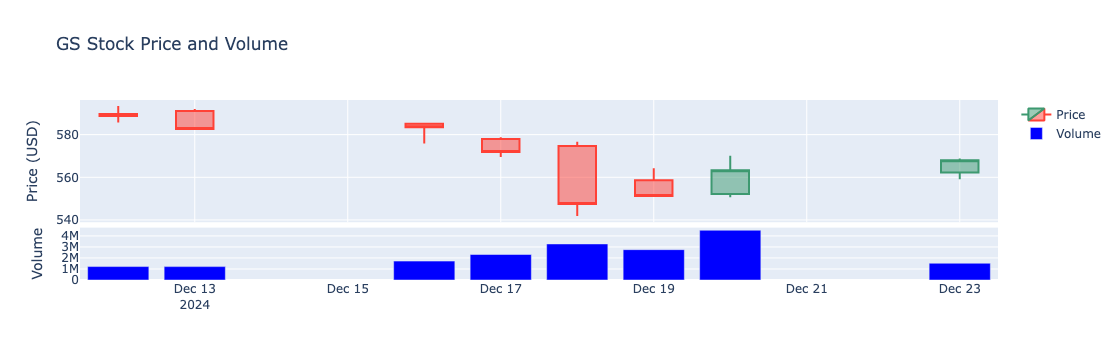

Detected Patterns:
 Price             Open        High         Low       Close Pattern
Ticker              GS          GS          GS          GS        
Date                                                              
2024-12-16  585.098694  585.367381  575.844594  583.436951  Hammer


In [11]:
import numpy as np
import pandas as pd
from datetime import datetime
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# === 1. DOWNLOAD DATA ===

start_date = datetime(2024, 12, 12)
end_date = datetime(2024, 12, 24)
stock_symbol = 'GS'

# Download stock data
stock = yf.download(stock_symbol, start=start_date, end=end_date)

# === 2. PATTERN DETECTION FUNCTIONS ===


def is_doji(row, threshold=0.1):
    return abs(row[('Open', 'GS')] - row[('Close', 'GS')]) <= threshold * (row[('High', 'GS')] - row[('Low', 'GS')])

def is_hammer(row):
    body = abs(row[('Close', 'GS')] - row[('Open', 'GS')])
    lower_shadow = min(row[('Open', 'GS')], row[('Close', 'GS')]) - row[('Low', 'GS')]
    upper_shadow = row[('High', 'GS')] - max(row[('Open', 'GS')], row[('Close', 'GS')])
    return lower_shadow > 2 * body and upper_shadow < body

def is_bullish_engulfing(prev_row, curr_row):
    return (prev_row[('Close', 'GS')] < prev_row[('Open', 'GS')]) and (curr_row[('Close', 'GS')] > curr_row[('Open', 'GS')]) and \
           (curr_row[('Close', 'GS')] > prev_row[('Open', 'GS')]) and (curr_row[('Open', 'GS')] < prev_row[('Close', 'GS')])

def is_bearish_engulfing(prev_row, curr_row):
    return (prev_row[('Close', 'GS')] > prev_row[('Open', 'GS')]) and (curr_row[('Close', 'GS')] < curr_row[('Open', 'GS')]) and \
           (curr_row[('Open', 'GS')] > prev_row[('Close', 'GS')]) and (curr_row[('Close', 'GS')] < prev_row[('Open', 'GS')])

# === 3. APPLY PATTERN DETECTION ===

patterns = ['']  # First row has no previous row

for i in range(1, len(stock)):
    row = stock.iloc[i].to_dict()
    prev_row = stock.iloc[i-1].to_dict()
    # row = stock.iloc[i]
    # prev_row = stock.iloc[i-1]
    
    if is_doji(row):
        patterns.append('Doji')
    elif is_hammer(row):
        patterns.append('Hammer')
    elif is_bullish_engulfing(prev_row, row):
        patterns.append('Bullish Engulfing')
    elif is_bearish_engulfing(prev_row, row):
        patterns.append('Bearish Engulfing')
    else:
        patterns.append('')

stock['Pattern'] = patterns

# === 4. CREATE CANDLESTICK + VOLUME CHART ===
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    row_heights=[0.7, 0.3], # Adjusting heights for price and volume
                    vertical_spacing=0.03)

# Add the candlestick chart to the first row
fig.add_trace(go.Candlestick(x=stock.index,
                             open=stock['Open'][stock_symbol],
                             high=stock['High'][stock_symbol],
                             low=stock['Low'][stock_symbol],
                             close=stock['Close'][stock_symbol],
                             name='Price'), 
              row=1, col=1)

# Add the volume bar chart to the second row
fig.add_trace(go.Bar(x=stock.index, 
                     y=stock['Volume'][stock_symbol], 
                     name='Volume', 
                     marker=dict(color='blue')), 
              row=2, col=1)

# Update layout for the figure
fig.update_layout(
    title=stock_symbol + " Stock Price and Volume",
    yaxis_title='Price (USD)',
    yaxis2_title='Volume',
    xaxis_rangeslider_visible=False
)

fig.show()


print("Detected Patterns:\n", stock[stock['Pattern'] != ''][['Open', 'High', 'Low', 'Close', 'Pattern']])
